# Portfolio assignment week 6

## 1. Decision Trees and Naive bayes
The scikit-learn library provides different parameters for decision trees and naive bayes. 

Based on the last code example [in the accompanying notebook](../Exercises/E_DT_NB.ipynb), add several new models to the `classifiers` variable. These models should have different parameters. For instance, create a new decision tree with a max depth of 1. Another possibility is to add different datasets or add noise.

Try to understand why some models behave differently than others. Give arguments what influences model performance and why.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB

In [2]:
def model_decision_tree(classifiers,names):

    datasets = [make_moons(), make_circles()]

    
    figure = plt.figure(figsize=(10, 5))

    i = 1

    # iterate over datasets
    for ds_count, ds in enumerate(datasets):
        X, y = ds

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=0
        )

        # determining min point and max point and add margin
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        # plot dataset
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        # plot original
        if ds_count == 0:
            ax.set_title('Input data')

        # plot training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        # plot testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

            # make pipeline to make it easier
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            DecisionBoundaryDisplay.from_estimator(
                clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )

            # plot training points
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            )
            # plot testing points
            ax.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c=y_test,
                cmap=cm_bright,
                edgecolors="k",
                alpha=0.6,
            )
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())

            if ds_count == 0:
                ax.set_title(name)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
            
    plt.tight_layout()
    plt.show()

There are some differences between decision trees and naive bayes. Decision Tree models make decisions based on feature splits, aiming to create a hierarchical structure. Naive Bayes models, on the other hand, use probabilistic calculations based on Bayes' theorem. Decision Trees can handle both numerical and categorical data while Naive Bayes assumes independence between features.

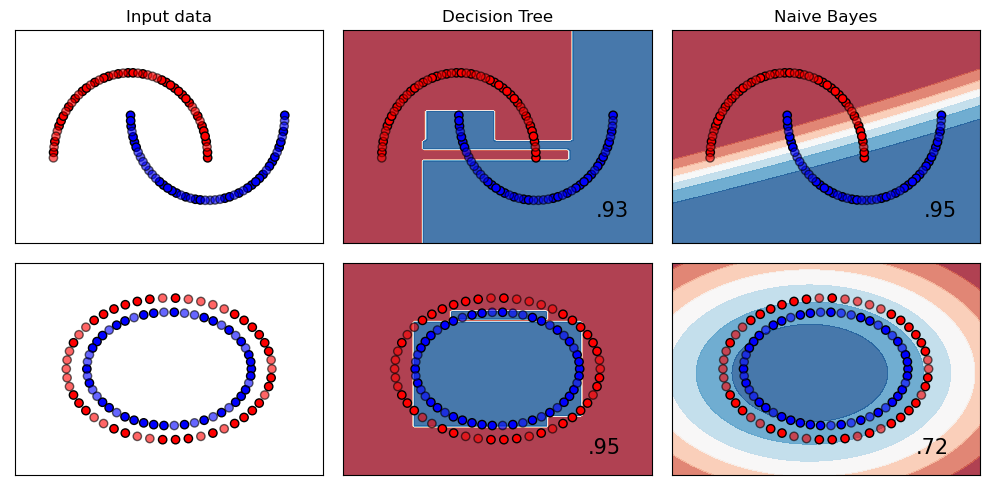

In [3]:
# Default parameters
names = ['Decision Tree', 'Naive Bayes']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB()]
model_decision_tree(classifiers,names)

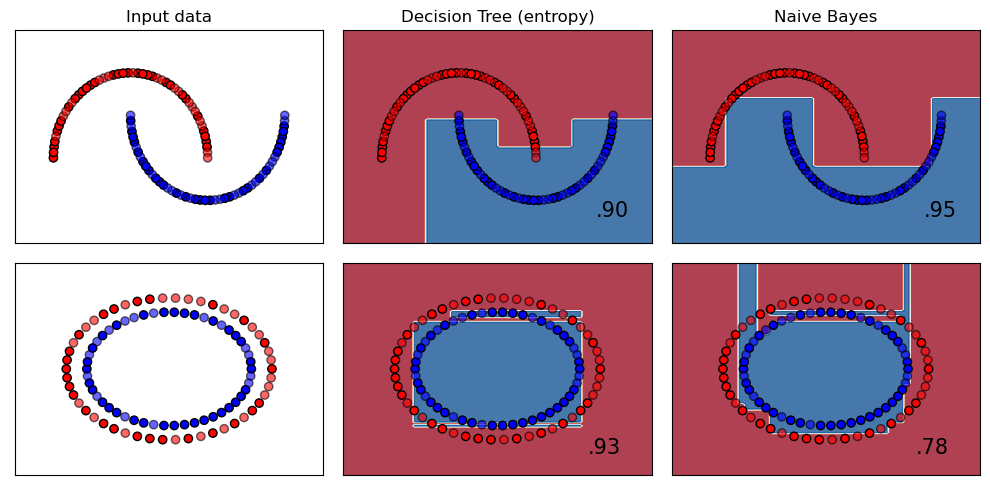

In [4]:
# Adjusting Decistion tree parameters
names = ['Decision Tree (entropy)', 'Naive Bayes']
classifiers = [tree.DecisionTreeClassifier(criterion = "entropy"), tree.DecisionTreeClassifier(splitter = "random")]
model_decision_tree(classifiers,names)

Changing the criterion (e.g., from "gini" to "entropy") affects how the Decision Tree measures the quality of each split. "Entropy" considers the information gain based on the entropy of the target variable, while "gini" uses the Gini impurity. The "splitter" parameter determines how the Decision Tree chooses the best split at each node. "Random" selects the best random split, while the default ("best") uses the best split based on the selected criterion.

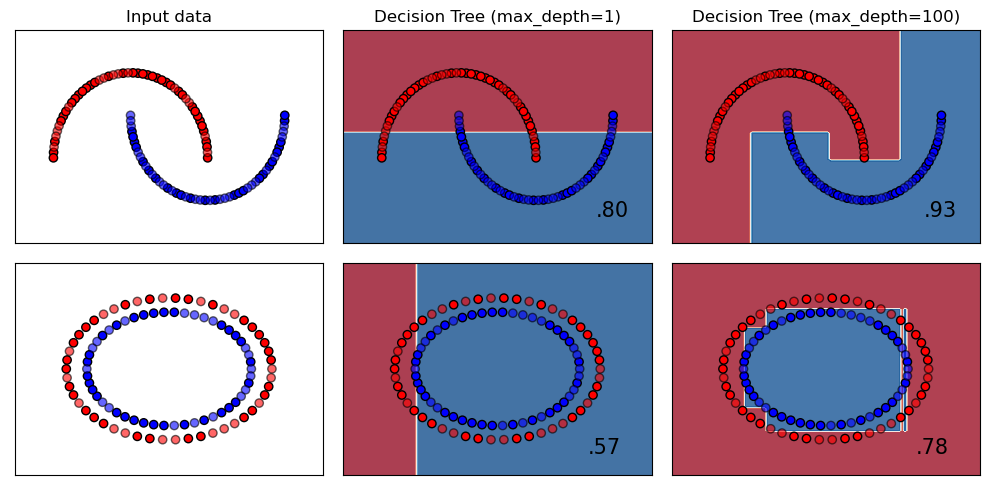

In [5]:
# Adjusting Decistion tree max depth
names = ['Decision Tree (max_depth=1)', 'Decision Tree (max_depth=100)']
classifiers = [tree.DecisionTreeClassifier(max_depth = 1), tree.DecisionTreeClassifier(max_depth = 100)]
model_decision_tree(classifiers,names)

The max_depth parameter limits the depth of the Decision Tree. A smaller max_depth can prevent overfitting by simplifying the tree structure, while a larger max_depth can lead to more complex decision boundaries. The Tree with a max_depth of 1 is very shallow, resulting in simple decision rules and will propbably underfit the data. However, setting it to 100 will likely overfit the data. 

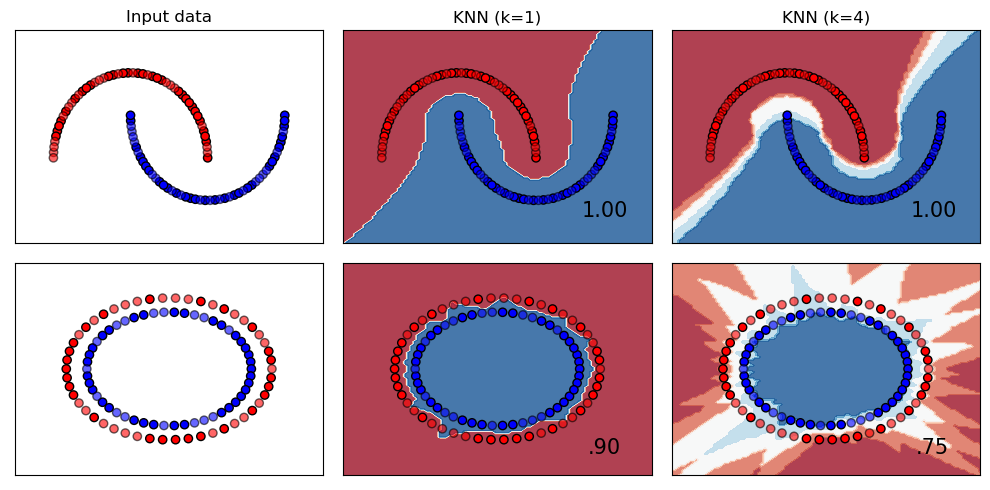

In [6]:
# Default parameters
names = ['KNN (k=1)', 'KNN (k=4)']
classifiers = [KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=4)]
model_decision_tree(classifiers,names)

KNN classifies samples based on the majority vote of their neighbors. The k parameter determines the number of neighbors considered for classification. A k of 1 seems to capture the data a lot better than a k of 4. 

## 2. Decision Tree Evaluation
As shown in the [in the accompanying notebook](../Exercises/E_DT_NB.ipynb) it is possible to visualize the decision tree. 

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the [breast cancer dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) which you can find on assemblix2019 (`/data/datasets/DS3/`). Go through the data science pipeline as you've done before:

1. Try to understand the dataset globally.
2. Load the data.
3. Exploratory analysis
4. Preprocess data (skewness, normality, etc.)
5. Modeling (cross-validation and training)
6. Evaluation
7. **Explanation**

Explain how the decision tree behaves under certain circumstances. What features seem important and how are the decisions made?

In [22]:
# Load data
# Loading data
import yaml

def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()
data = (config['breast-cancer'])
df = pd.read_csv(data)

In [23]:
# Displaying number of malign
print(f'\nNumber of malignent tumors: {len(df[df.diagnosis == "M"])}')
print(f'Number of benign tumors: {len(df[df.diagnosis == "B"])}\n')
    
# Displaying number of columns and rows, datatypes, missing values
print(df.info())


Number of malignent tumors: 212
Number of benign tumors: 357

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se       

In [24]:
X = df.drop(['id', 'diagnosis'], axis = 1)

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = df['diagnosis']

# Encoding the "diagnosis" column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [26]:
# Perform cross-validation
dt = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(dt, X_scaled, y_encoded, cv=5) 
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 0.9226362366092221


In [27]:
# Train model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

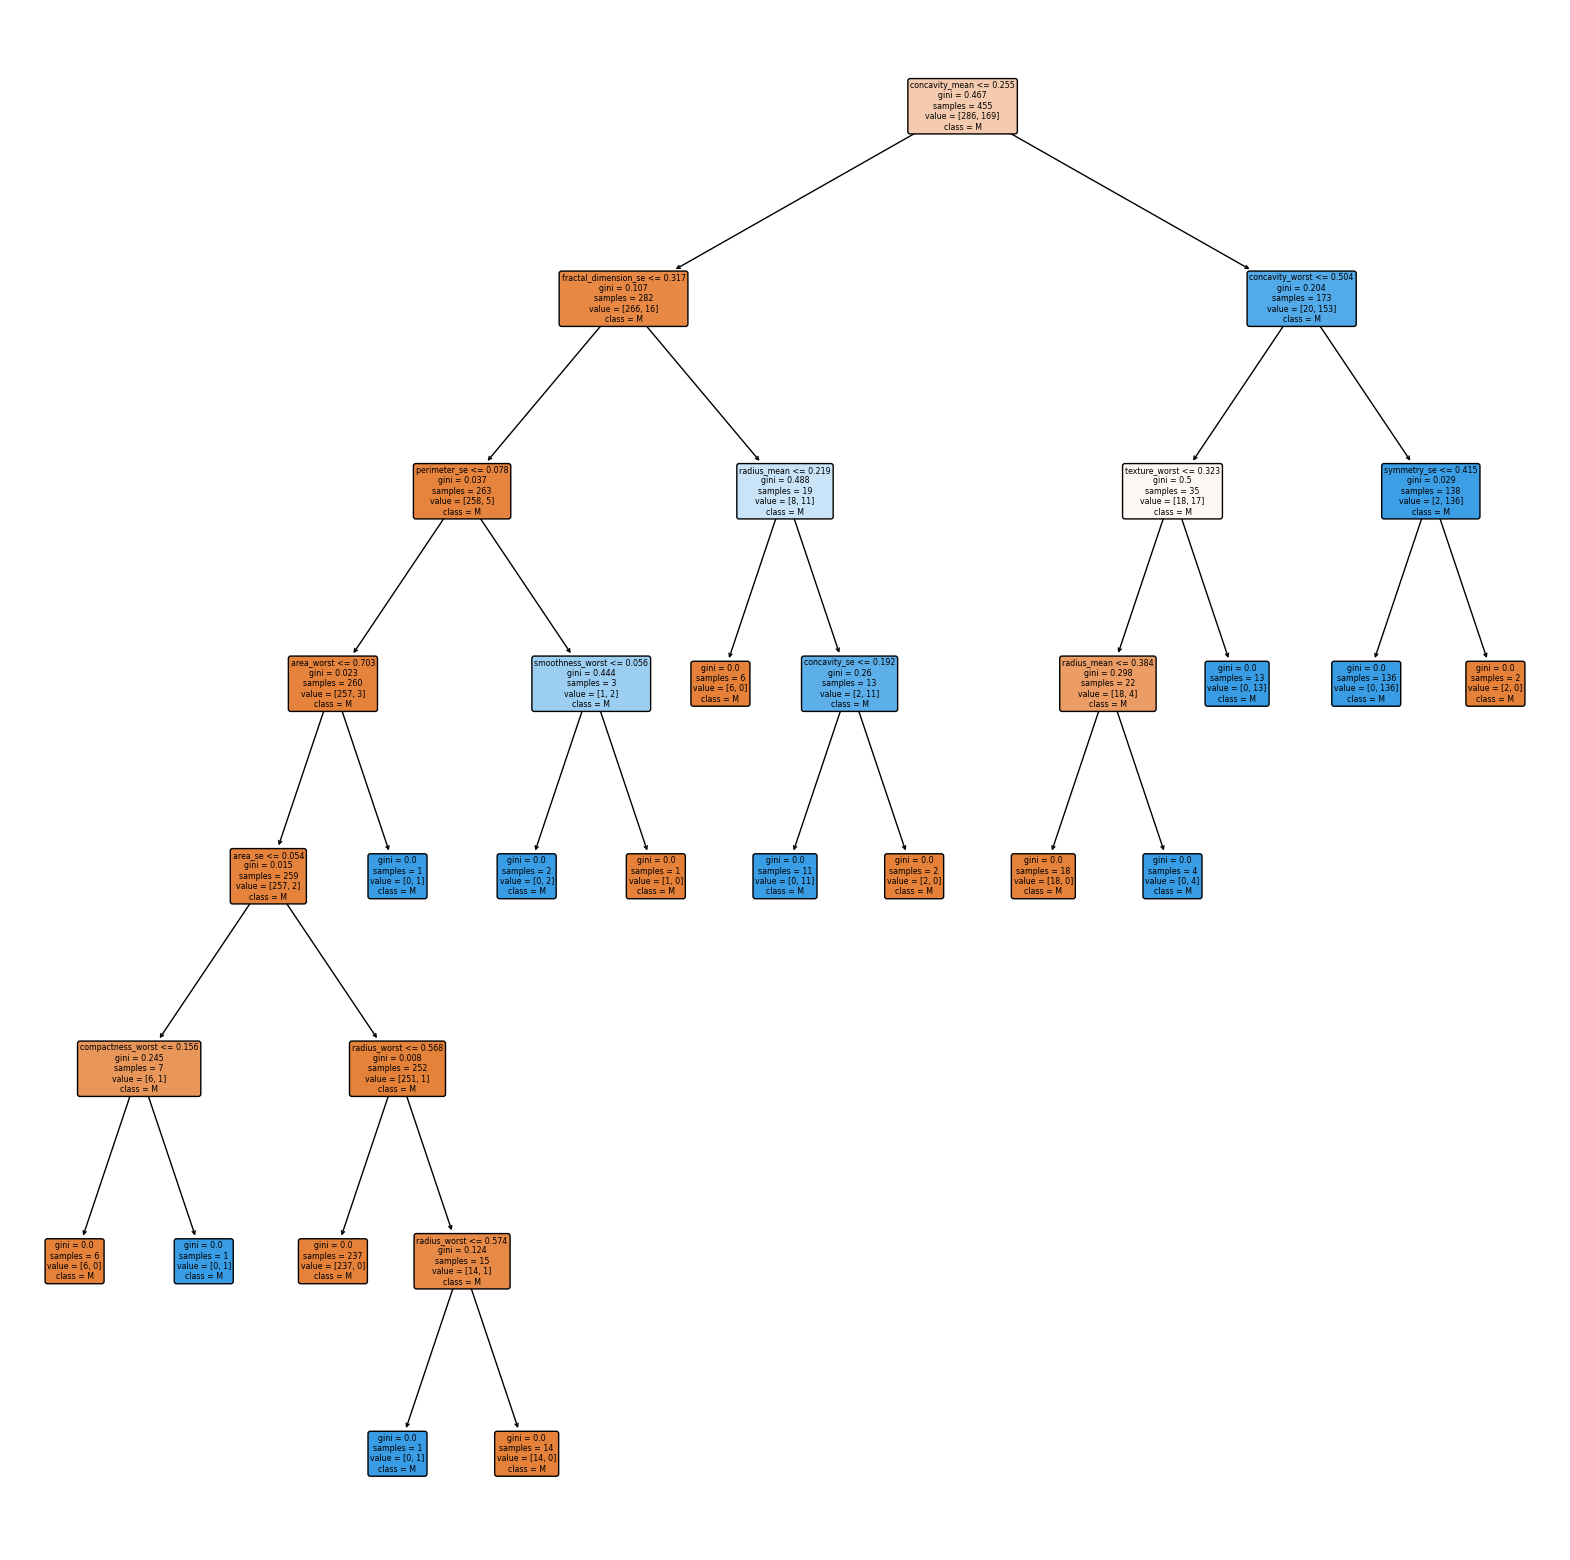

In [28]:
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt, 
    feature_names=df.columns.tolist()[1:], 
    class_names=df['diagnosis'],
    filled=True,
    rounded=True,
)
plt.show()

The most important features appear to be concavity_mean followed by fractal_dimension_se and concavity_worst, shown closest to the root. Decision Trees make decisions by traversing down the tree from the root node to leaf nodes based on the feature values of the samples. At each internal node, the tree evaluates a specific feature and selects a branch based on the feature's value. The process continues until reaching a leaf node.


In [14]:
# Evaluate model
y_pred = dt.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[67  4]
 [ 4 39]]


The model achieves an overall accuracy of 0.93, indicating that 93% of the samples are correctly classified. The model shows balanced precision, recall, and F1-score for both classes, suggesting a good performance in predicting both class 0 and class 1.

## 3. Naive Bayes 

During the Corona pandemic, seven roommates in a student house did a Corona test. The table below show the data of these students: whether they experiences shivers, had a running nose, or had a headache. The test result is also shown.

Roommate | shivers | running nose | headache | test result
--|--|--|--|--
1 | Y | N | No | Negative
2 | N | N | Mild | Negative
3 | Y | Y | No | Positive
4 | N | Y | No | Negative
5 | N | N | Heavy | Positive
6 | Y | N | No | Negative
7 | Y | Y | Mild | Positive

**Explain why it is not useful to include the column 'Roommate' in a classification procedure.**

The roomate column doesn't provide any meaningful information regarding the test results and won't hold any predictive power for the classification procedure. If you did include it, it would only add noise to the model and could be misleading.

**Train a [Categorical Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) classifier on this dataset, where the Test Results are your classes and the other features the data. For this to work, you'll need [Pandas `get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to transform the nominal data into something that sklearn can work with. Use all seven rows in your training.**

In [15]:
data = {'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'],
        'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'],
        'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'],
        'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']}

df = pd.DataFrame(data)

In [16]:
# Transform nominal data into numerical
X = pd.get_dummies(df.drop('test result', axis=1))
y = df['test result']

In [17]:
# Train categorical naive bayes classifier
classifier = CategoricalNB()
classifier.fit(X, y)

CategoricalNB()

In [18]:
predictions = classifier.predict(X)
df['predicted result'] = predictions
print(df)

  shivers running nose headache test result predicted result
0       Y            N       No    Negative         Negative
1       N            N     Mild    Negative         Negative
2       Y            Y       No    Positive         Positive
3       N            Y       No    Negative         Negative
4       N            N    Heavy    Positive         Negative
5       Y            N       No    Negative         Negative
6       Y            Y     Mild    Positive         Positive


**If you let your fitted classifier predict the test results (based on all the data), you will (hopefully) see that the prediction for observation number 5 (1-based) is wrong (it predicts Negative while the actual value is Positive). Show by manual calculation that the prediction for this instance is indeed higher ($p=0.527$) for the Negative class than for the Positive class.**

In [19]:
roommate5 = X.iloc[4:5,:]
prediction_probs = classifier.predict_proba(roommate5)
print("Prediction Probabilities:")
print("Negative:", prediction_probs[0][0])
print("Positive:", prediction_probs[0][1])

Prediction Probabilities:
Negative: 0.5981410732469201
Positive: 0.4018589267530796
